🎉 Hello, Valcir! Welcome to the Posit Workbench Demo.
✔️ The square of 92 is 8464


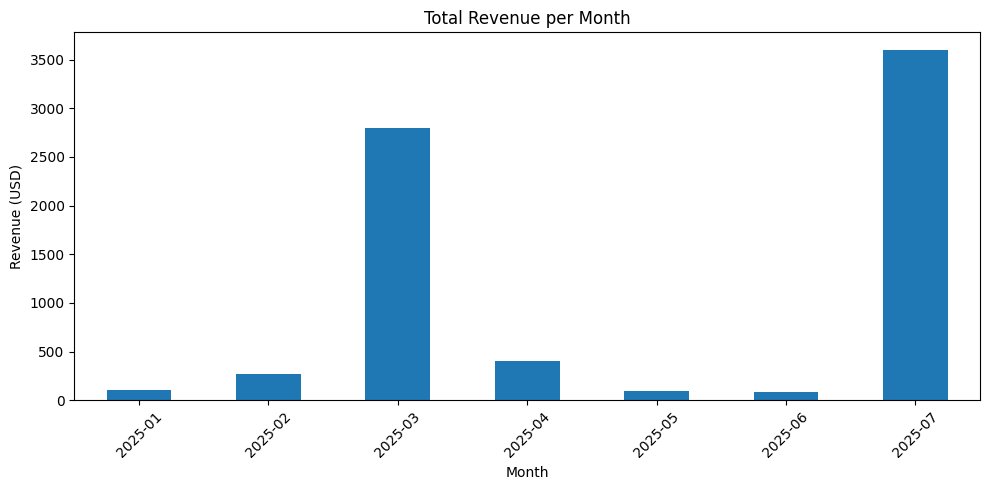

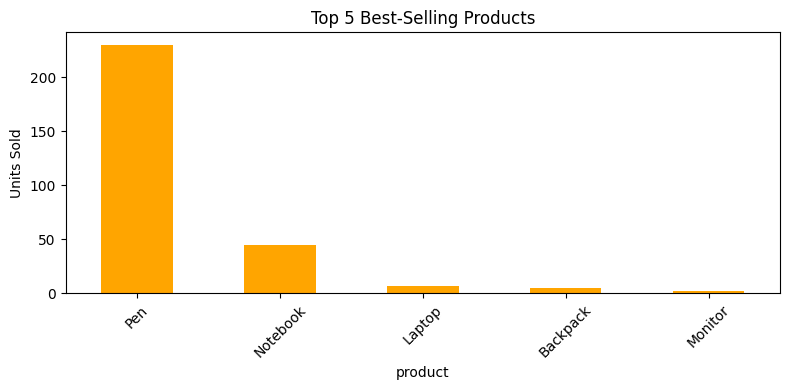

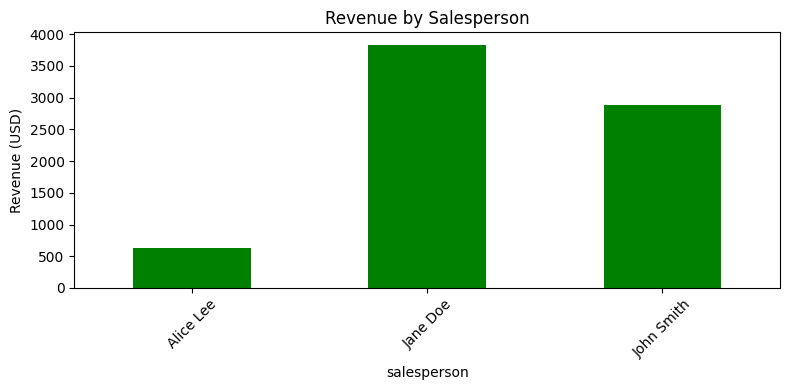

,date,product,salesperson,units_sold,unit_price,total_revenue,month
0,2025-01-15,Notebook,John Smith,10,5.99,59.90,2025-01
1,2025-01-17,Pen,Jane Doe,50,0.99,49.50,2025-01
2,2025-02-05,Notebook,John Smith,20,5.99,119.80,2025-02
3,2025-02-10,Backpack,Alice Lee,5,29.99,149.95,2025-02
4,2025-03-12,Pen,Jane Doe,100,0.99,99.00,2025-03
5,2025-03-15,Laptop,John Smith,3,899.99,2699.97,2025-03
6,2025-04-03,Monitor,Alice Lee,2,199.99,399.98,2025-04
7,2025-05-21,Notebook,Jane Doe,15,5.99,89.85,2025-05
8,2025-06-02,Pen,Alice Lee,80,0.99,79.20,2025-06
9,2025-07-01,Laptop,Jane Doe,4,899.99,3599.96,2025-07


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from kimbodo_posit_demo_utils.formatting import greet, square_and_log


print(greet("Valcir"))
print(square_and_log(92))
# Load CSV
df = pd.read_csv("sales_data.csv", parse_dates=["date"])

# Add calculated columns
df["total_revenue"] = df["units_sold"] * df["unit_price"]
df["month"] = df["date"].dt.to_period("M")

# --- Total Revenue per Month ---
monthly_revenue = df.groupby("month")["total_revenue"].sum()

plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind="bar")
plt.title("Total Revenue per Month")
plt.ylabel("Revenue (USD)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Top 5 Best-Selling Products ---
product_sales = df.groupby("product")["units_sold"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
product_sales.plot(kind="bar", color="orange")
plt.title("Top 5 Best-Selling Products")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Revenue by Salesperson ---
salesperson_revenue = df.groupby("salesperson")["total_revenue"].sum()

plt.figure(figsize=(8, 4))
salesperson_revenue.plot(kind="bar", color="green")
plt.title("Revenue by Salesperson")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Display full DataFrame ---
df.sort_values("date")